In [310]:
from pandas_datareader import data
import re
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as plt

## Pandas의 기본 목적
- 누락된 데이터를 유연하게 처리하는 기능
- 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 기능
- 통합된 시계열 기능
- SQ처럼 관계연산을 가능하게 하는 기능

- Series는 일력의 객체를 담을 수 있는 1차원 배열같은 자료 구조

In [3]:
obj = Series([10,20,30,40])
obj

0    10
1    20
2    30
3    40
dtype: int64

In [4]:
obj.values

array([10, 20, 30, 40], dtype=int64)

In [5]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
obj2 =Series([30,201,223,42],index=['a','b','c','d'])
obj2

a     30
b    201
c    223
d     42
dtype: int64

In [7]:
obj2[obj2>50]

b    201
c    223
dtype: int64

In [8]:
obj2*2

a     60
b    402
c    446
d     84
dtype: int64

In [9]:
sdata = {'Obiio':35000, 'Texas':1200,'Oregon':1500}

In [10]:

obj3 = Series(sdata)
obj3

Obiio     35000
Texas      1200
Oregon     1500
dtype: int64

In [11]:
states =['Texas','Oregon','Seoul']
obj4 = Series(sdata, index=states)
obj4

Texas     1200.0
Oregon    1500.0
Seoul        NaN
dtype: float64

In [12]:
obj4.index.name='Tokyo'
obj4

Tokyo
Texas     1200.0
Oregon    1500.0
Seoul        NaN
dtype: float64

In [13]:
#series 객체의 name 속성
obj4.name='sss'

In [14]:
obj4

Tokyo
Texas     1200.0
Oregon    1500.0
Seoul        NaN
Name: sss, dtype: float64

In [15]:
data = {'state':['Ohio','Nevada','NewYork'],
       'year':[2000,2020,1990],
       'pop':[12,32,45]}
frame =DataFrame(data)

In [16]:
frame

,state,year,pop
0,Ohio,2000,12
1,Nevada,2020,32
2,NewYork,1990,45


In [17]:
frame.columns

Index(['state', 'year', 'pop'], dtype='object')

In [18]:
frame['state']

0       Ohio
1     Nevada
2    NewYork
Name: state, dtype: object

In [19]:
frame.year

0    2000
1    2020
2    1990
Name: year, dtype: int64

In [20]:
frame.loc[0]

state    Ohio
year     2000
pop        12
Name: 0, dtype: object

In [21]:
obj = Series(range(3), index=['a','b','c'])
index = obj.index
index[1:]

Index(['b', 'c'], dtype='object')

In [22]:
#색인 객체는 변경 불가능
#index[1]='d'

In [23]:
'state' in frame.columns

True

In [24]:
obj5= Series([1,2,3,4])

In [25]:
obj5

0    1
1    2
2    3
3    4
dtype: int64

In [26]:
data = DataFrame(np.arange(16).reshape((4,4)), index=['a','b','c','d'],columns=['one','two','three','four'])
data.drop(['a','b'])

,one,two,three,four
c,8,9,10,11
d,12,13,14,15


In [27]:
data.drop(['one','two'], axis=1)

,three,four
a,2,3
b,6,7
c,10,11
d,14,15


In [63]:
# DataFrame.drop은 index와 column 둘다 삭제 가능\

#index를 입력 , column을 입력
data.loc['a',['one','two']]

one    0
two    1
Name: a, dtype: int32

In [2]:
df1 = DataFrame(np.arange(9).reshape((3,3)), columns = list('bcd'), index=['ohio','texas','Oregon'])
df2 = DataFrame(np.arange(12).reshape((4,3)), columns=list('bde'), index=['Utah','ohio','texas','Oregon'])

In [68]:
df1+ df2

,b,c,d,e
Oregon,15.0,NaN,18.0,NaN
Utah,NaN,NaN,NaN,NaN
ohio,3.0,NaN,6.0,NaN
texas,9.0,NaN,12.0,NaN


In [69]:
df1

,b,c,d
ohio,0,1,2
texas,3,4,5
Oregon,6,7,8


In [70]:
df2

,b,d,e
Utah,0,1,2
ohio,3,4,5
texas,6,7,8
Oregon,9,10,11


In [71]:
df1.add(df2, fill_value=0)

,b,c,d,e
Oregon,15.0,7.0,18.0,11.0
Utah,0.0,NaN,1.0,2.0
ohio,3.0,1.0,6.0,5.0
texas,9.0,4.0,12.0,8.0


In [72]:
arr = np.arange(12).reshape((3,4))

In [73]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [74]:
arr-arr[0]

array([[0, 0, 0, 0],
       [4, 4, 4, 4],
       [8, 8, 8, 8]])

In [30]:
f = lambda x: x.max()-x.min()

In [57]:
data.apply(f,axis=1)

,min,max
a,0,3
b,4,7
c,8,11
d,12,15


In [58]:
data.apply(f)

,one,two,three,four
min,0,1,2,3
max,12,13,14,15


In [32]:
def f(x):
    return Series([x.min(), x.max()], index=['min','max'])

data.apply(f)

,one,two,three,four
min,0,1,2,3
max,12,13,14,15


In [33]:
obj = Series(range(4), index=['d','a','b','c'])

In [34]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [35]:
data

,one,two,three,four
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [44]:
frame = DataFrame(np.arange(12.).reshape((4,3)), columns = list('bde'), index=['Utah','Ohio','Texas','Oregon'])

In [49]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [50]:
series= frame.loc['Utah']

In [51]:
frame-series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [53]:
series2 = Series(range(3), index=['b','e','f'])
frame +series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [54]:
series3 = frame['d']

frame.sub(series3,axis =0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [55]:
frame = DataFrame(np.random.randn(4,3), columns = list('bde'),index = ['Utah','Ohio','Texas','Oregon'])
frame

,b,d,e
Utah,0.637660,0.578019,0.585303
Ohio,-0.861356,1.448786,0.631287
Texas,-1.328440,-0.568035,-1.058228
Oregon,0.196732,-0.735896,-0.006990


In [56]:
np.abs(frame)

,b,d,e
Utah,0.637660,0.578019,0.585303
Ohio,0.861356,1.448786,0.631287
Texas,1.328440,0.568035,1.058228
Oregon,0.196732,0.735896,0.006990


In [65]:
f2 = lambda x: '%.2f' %x

frame.applymap(f2)

,b,d,e
Utah,0.64,0.58,0.59
Ohio,-0.86,1.45,0.63
Texas,-1.33,-0.57,-1.06
Oregon,0.20,-0.74,-0.01


In [72]:
frame.dtypes

b    float64
d    float64
e    float64
dtype: object

In [81]:
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [89]:
obj = Series(range(4), index=['a','b','c','d'])

In [90]:
obj.sort_index()

a    0
b    1
c    2
d    3
dtype: int64

In [95]:
frame = DataFrame({'b':[4,7,-3,2],'a':[0,1,2,3]}, index=['q','b','h','e'])

In [100]:
frame.sort_index()

,b,a
b,7,1
e,2,3
h,-3,2
q,4,0


In [111]:
f3 = lambda x: x.mean()

type(frame.apply(f3,axis=1))

pandas.core.series.Series

In [116]:
frame.apply(f3,axis=1)

q    2.0
b    4.0
h   -0.5
e    2.5
dtype: float64

In [117]:
df = DataFrame([[1.4,np.nan],[7.1,4.5],[np.nan,np.nan],[0.75,-2]],index=['a','b','c','d'], columns =['one','two'])

In [121]:
df.mean(axis=1, skipna=False)

a      NaN
b    5.800
c      NaN
d   -0.625
dtype: float64

In [123]:
## 최대값을 갖는 index 반환

df.idxmax()

one    b
two    b
dtype: object

In [127]:
#누산
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,4.5
c,NaN,NaN
d,9.25,2.5


In [128]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,1.250000
std,3.493685,4.596194
min,0.750000,-2.000000
25%,1.075000,-0.375000
50%,1.400000,1.250000
75%,4.250000,2.875000
max,7.100000,4.500000


In [132]:
all_data ={}
for ticker in ['AAPL','IBM','MSFT','GOOG']:
    all_data[ticker]= data.DataReader(ticker,'yahoo','2015-01-01','2016-01-01')

In [134]:
price = DataFrame({tic:data['Adj Close'] for tic, data in all_data.items()})
volume = DataFrame({tic:data['Volume'] for tic, data in all_data.items()})

In [143]:
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2014-12-31,25.181044,124.624557,41.371773,524.958740
2015-01-02,24.941502,125.882919,41.647892,523.373108
2015-01-05,24.238857,123.902168,41.264908,512.463013
2015-01-06,24.241146,121.230103,40.659245,500.585632
2015-01-07,24.581060,120.437820,41.175831,499.727997


In [139]:
returns = price.pct_change()

In [144]:
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2015-12-24,-0.005340,-0.002093,-0.002687,-0.002546
2015-12-28,-0.011201,-0.004629,0.005030,0.018854
2015-12-29,0.017974,0.015769,0.010724,0.018478
2015-12-30,-0.013059,-0.003148,-0.004244,-0.007211
2015-12-31,-0.019195,-0.012344,-0.014740,-0.015720


In [147]:
#상관관계
returns.MSFT.corr(returns.IBM)

0.5495956834127399

In [148]:
#공분산
returns.MSFT.cov(returns.IBM)

0.000130444536519066

In [149]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.513896,0.522402,0.381051
IBM,0.513896,1.000000,0.549596,0.451361
MSFT,0.522402,0.549596,1.000000,0.520430
GOOG,0.381051,0.451361,0.520430,1.000000


In [150]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000284,0.000116,0.000156,0.000119
IBM,0.000116,0.000178,0.000130,0.000112
MSFT,0.000156,0.000130,0.000316,0.000172
GOOG,0.000119,0.000112,0.000172,0.000345


In [160]:
returns.corrwith(volume)

AAPL   -0.119688
IBM    -0.297121
MSFT   -0.004252
GOOG    0.405849
dtype: float64

In [171]:
#unique와 value_counts는 Series method이다

In [322]:
data = DataFrame({'Que1':[1,3,4,2,5],'Que2':[3,2,5,1,4],'Que3':[5,4,3,2,1]})
data

,Que1,Que2,Que3
0,1,3,5
1,3,2,4
2,4,5,3
3,2,1,2
4,5,4,1


In [323]:
result = data.apply(pd.value_counts).fillna(0)

In [324]:
result

,Que1,Que2,Que3
5,1,1,1
4,1,1,1
3,1,1,1
2,1,1,1
1,1,1,1


In [326]:
result1= data.apply(pd.unique)
result1

,Que1,Que2,Que3
0,1,3,5
1,3,2,4
2,4,5,3
3,2,1,2
4,5,4,1


In [175]:
string_data = Series(['aardvark','artichoke',np.nan,'avocado'])

string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [176]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [178]:
data = Series([1,np.nan, 3.5, np.nan])

In [180]:
data[data.notnull()]

0    1.0
2    3.5
dtype: float64

In [182]:
df = DataFrame(np.random.randn(6,3))

In [183]:
df

,0,1,2
0,-0.616205,-0.265684,-0.539013
1,0.142330,0.540011,0.474395
2,0.793172,0.879701,1.310656
3,0.267218,-3.347332,0.449466
4,-1.520102,0.293447,0.561467
5,-0.080167,-0.774053,0.087131


In [184]:
df.unstack()

0  0   -0.616205
   1    0.142330
   2    0.793172
   3    0.267218
   4   -1.520102
   5   -0.080167
1  0   -0.265684
   1    0.540011
   2    0.879701
   3   -3.347332
   4    0.293447
   5   -0.774053
2  0   -0.539013
   1    0.474395
   2    1.310656
   3    0.449466
   4    0.561467
   5    0.087131
dtype: float64

In [319]:
ser2 = Series(np.arange(3.), index=['a','b','c'])

ser2.iloc[2]

2.0

In [202]:
# dataframe 의 합성은 pd.merge(key) 를 이용해서 진행한다.
#기본적으로 같은 이름을 가진 것으로 찾고 아니면 on='key' 지정 만약 공통된 칼럼이 없다면 left_on='key1' right_on='key2'로 입력

In [203]:
s1 = Series([0,1],index=['a','b'])
s2 = Series([2,3,4], index=['c','d','e'])
s3 = Series([5,6], index= ['f','g'])

In [204]:
pd.concat([s1,s2])

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [210]:
#axis 1 로 준다면 dataframe, 0이면 series로 넘겨준다.
pd.concat([s1,s2],axis=1, keys=['a','b'])

,a,b
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0
e,NaN,4.0


In [214]:
data = DataFrame({'k1':['one']*3 +['two']*4,'k2':[1,1,2,3,4,5,5]})

In [215]:
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,4
5,two,5
6,two,5


In [216]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
4,two,4
5,two,5


In [217]:
data['v1'] = range(7)

In [219]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [220]:
data.drop_duplicates(['k1','k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
4,two,4,4
5,two,5,5


In [231]:
data = DataFrame({'food':['bacon','pulled pork','bacon','pastrami','corned beef','bacon','pastrami','honey ham'],'ounces':[5,4,3,2,1,2,8,9]})

In [222]:
data

,food,ounces
0,bacon,5
1,pulled pork,4
2,bacon,3
3,pastrami,2
4,corned beef,1
5,bacon,2
6,pastrami,8
7,honey ham,9


In [225]:
meat_to_animal={
    'bacon':'pig',
    'pulled pork':'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig',
    'nova lox':'salmon'
}

data['food'].map(lambda x: meat_to_animal[x.lower()])

0    pig
1    pig
2    pig
3    cow
4    cow
5    pig
6    cow
7    pig
Name: food, dtype: object

In [239]:
data = Series([1.,-999,3,-32,11,-1000,3])

In [241]:
data

0       1.0
1    -999.0
2       3.0
3     -32.0
4      11.0
5   -1000.0
6       3.0
dtype: float64

In [228]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       3.0
3     -32.0
4      11.0
5   -1000.0
6       3.0
dtype: float64

In [229]:
data.replace([-999,3],np.nan)

0       1.0
1       NaN
2       NaN
3     -32.0
4      11.0
5   -1000.0
6       NaN
dtype: float64

In [243]:
ages = [20, 22, 26, 95, 35, 71 ,51 ,10, 45]

In [245]:
cate = [5,22,30,80,100]

In [318]:
pd.value_counts(pd.cut(ages, cate,labels=['Youth','youngAdult','MiddleAged','Senior']))

MiddleAged    4
Youth         3
Senior        1
youngAdult    1
dtype: int64

In [251]:
data = DataFrame(np.random.randn(1000,4))

In [252]:
col = data[3]

col[np.abs(col)>3]


196    3.392277
Name: 3, dtype: float64

In [255]:
val = 'a, b, guido'

In [258]:
val.split(',')

['a', ' b', ' guido']

In [259]:
pieces = [x.strip() for x in val.split(',')]

In [260]:
pieces

['a', 'b', 'guido']

In [261]:
first , second, third = pieces

In [263]:
' '.join(pieces)

'a b guido'

In [265]:
text = "foo bar\t baz \tqux"

In [266]:
text

'foo bar\t baz \tqux'

In [267]:
re.split('\s+',text)

['foo', 'bar', 'baz', 'qux']

In [269]:
regex = re.compile('\s+')

regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [270]:
regex.findall(text)

[' ', '\t ', ' \t']

In [287]:
text = """Dave dave@google.com
Steve steve@gamil.com
Rob rob@gmail.com
Tyan ryan@yahoo.com
"""
pattern = r'[A-Z0-9/_%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [288]:
#re.IGNORECASE 대소문자 무시
regex = re.compile(pattern, flags = re.IGNORECASE)

In [289]:
#정규 표현식을 이용한 필터링
regex.findall(text)

['dave@google.com', 'steve@gamil.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [290]:
m = regex.search(text)

In [291]:
text[m.start():m.end()]

'dave@google.com'

In [298]:
print(regex.sub('바뀐 문자열',text))

Dave 바뀐 문자열
Steve 바뀐 문자열
Rob 바뀐 문자열
Tyan 바뀐 문자열



In [299]:
pattern = r'([A-Z0-9/_%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [301]:
regex = re.compile(pattern, flags = re.IGNORECASE)

In [302]:
m = regex.match('wem@bright.net') 

In [305]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gamil', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [306]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3',text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gamil, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Tyan Username: ryan, Domain: yahoo, Suffix: com



In [316]:
fig, axes = plt.subplots(2,1)

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [317]:
data

<module 'pandas_datareader.data' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\pandas_datareader\\data.py'>

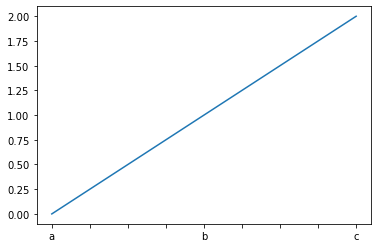

In [321]:
#series도 matplotlib을 이용하여 시각화 가능
ser2.plot()